In [3]:
library(randomForest)
library(rpart)
wholeSet = read.csv("./merged.csv")
trainingSize = nrow(wholeSet) * .9
trainingSetIndices = sample(1:nrow(wholeSet), trainingSize)
testingSetIndices = setdiff(rownames(wholeSet),trainingSetIndices)
trainingSet = wholeSet[trainingSetIndices,]
testingSet = wholeSet[testingSetIndices,]
formula = set~iperf+sysbench+ycruncher+pgbench


# Random Forest - Regression
treat n as continuous value

In [4]:
modelRandomForest <- randomForest(
    formula,
    data=trainingSet,
    mtry=4,
    ntree=2001
)
modelRandomForest


Call:
 randomForest(formula = formula, data = trainingSet, mtry = 4,      ntree = 2001) 
               Type of random forest: regression
                     Number of trees: 2001
No. of variables tried at each split: 4

          Mean of squared residuals: 1.26151
                    % Var explained: 91.54

In [15]:
predicted <- predict(modelRandomForest, testingSet)
cat("R-squared on testingSet:",cor(predicted, testingSet[,'set'])^2,"\n")


,iperf,sysbench,ycruncher,pgbench,set,vm
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1158,8.4582,7.197,52355.00,1,1
4,1156,8.4596,7.198,58885.00,1,1
5,1167,8.4463,7.212,58885.00,1,1
6,1161,8.4477,7.211,58885.00,1,1
11,1149,8.4644,7.230,64128.00,2,1
31,1180,8.4588,7.262,64484.00,3,1
34,1147,8.4524,7.252,58569.33,3,1
39,1191,8.4452,7.259,58569.33,3,1
47,1210,8.4603,7.236,58481.00,3,2


[1]  1  1  1  1  2  3  3  3  3  4  4  4  5  5  5  5  6  6  6  6  6  6  6  7  7
 [26]  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10
 [51] 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12
 [76] 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14
[101] 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15
[126] 15 16 16 16 16 16 16 16 16 16 16

R-squared on testingSet: 0.9203234 


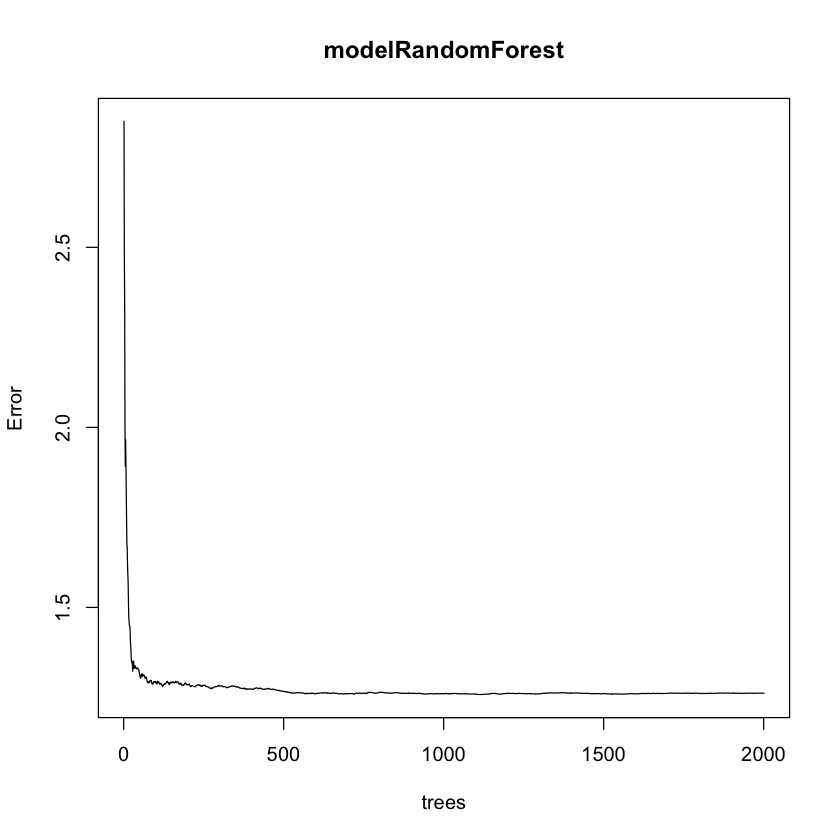

In [6]:
par(mfrow=c(1,1))
plot(modelRandomForest)

In [7]:
test.err= with(testingSet, mean( (set - predicted)^2))
test.err# Mean of squared residuals:

[1] 1.260662

In [8]:
oob.err = double(4)
test.err = double(4)
for(mtry in 1:4) 
{
  rf=randomForest(formula = formula , data = trainingSet, mtry=mtry,ntree=400) 
  oob.err[mtry] = rf$mse[400] #Error of all Trees fitted
  
  pred<-predict(rf,testingSet) #Predictions on Test Set for each Tree
  test.err[mtry]= with(testingSet, mean( (set - pred)^2)) #Mean Squared Test Error
  
  cat(mtry," ") #printing the output to the console
  
}

1  2  3  4  

[1] 1.656760 1.355745 1.337038 1.253269

[1] 1.554832 1.245929 1.251261 1.257351

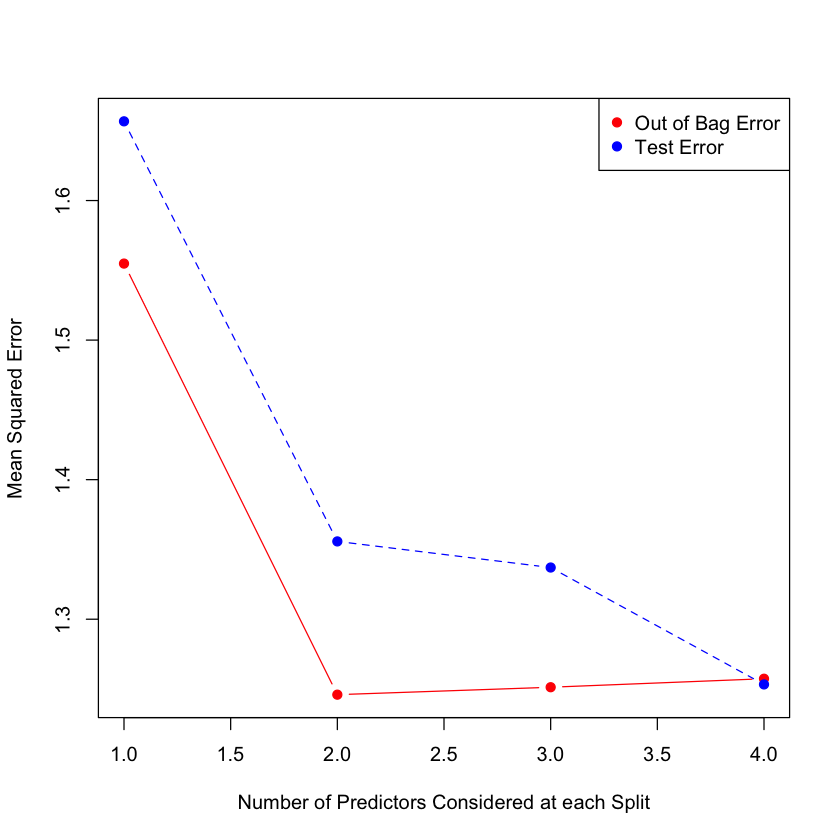

In [9]:
test.err
oob.err
matplot(1:mtry , cbind(oob.err,test.err), pch=19 , col=c("red","blue"),type="b",ylab="Mean Squared Error",xlab="Number of Predictors Considered at each Split")
legend("topright",legend=c("Out of Bag Error","Test Error"),pch=19, col=c("red","blue"))

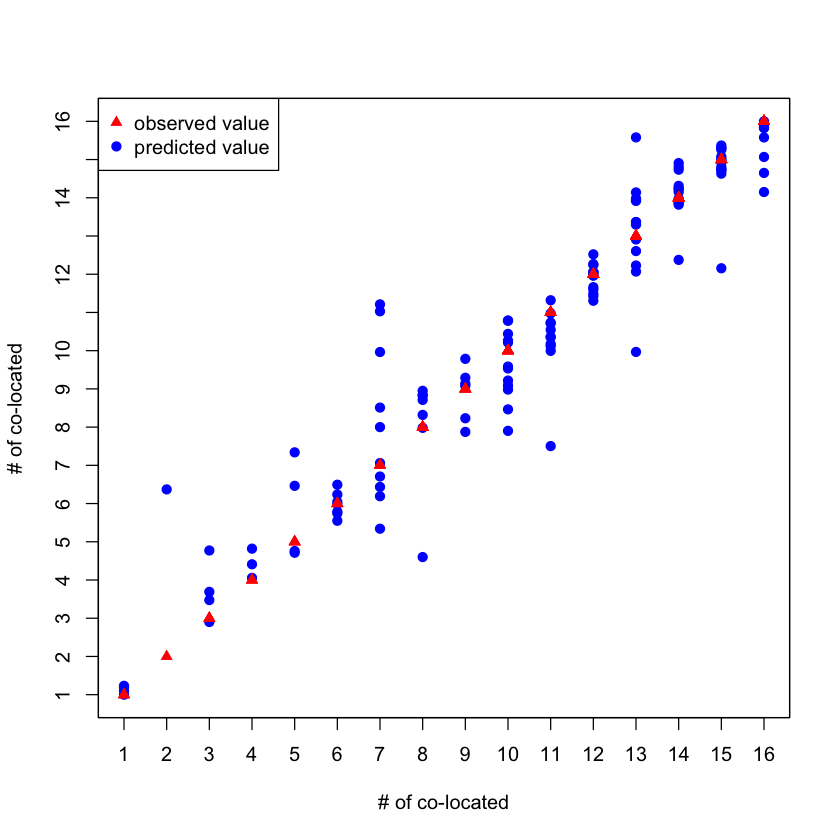

In [10]:
comparason = cbind(predicted,testingSet['set'])

plot(x = comparason$set , y = comparason$predicted,col="blue",pch=19,xlab="# of co-located",ylab="# of co-located", xaxt='n',yaxt='n')
par(new=TRUE)
plot(x = comparason$set , y = comparason$set, col="red",pch=17, xlab='', ylab='', xaxt='n',yaxt='n')
axis(1,1:16)
axis(2,1:16)
legend("topleft",legend=c("observed value","predicted value"),pch=c(17,19), col=c("red","blue"))

# Rounded

In [11]:
#saveRDS(modelRandomForest, "./modelRandomForest.rds")

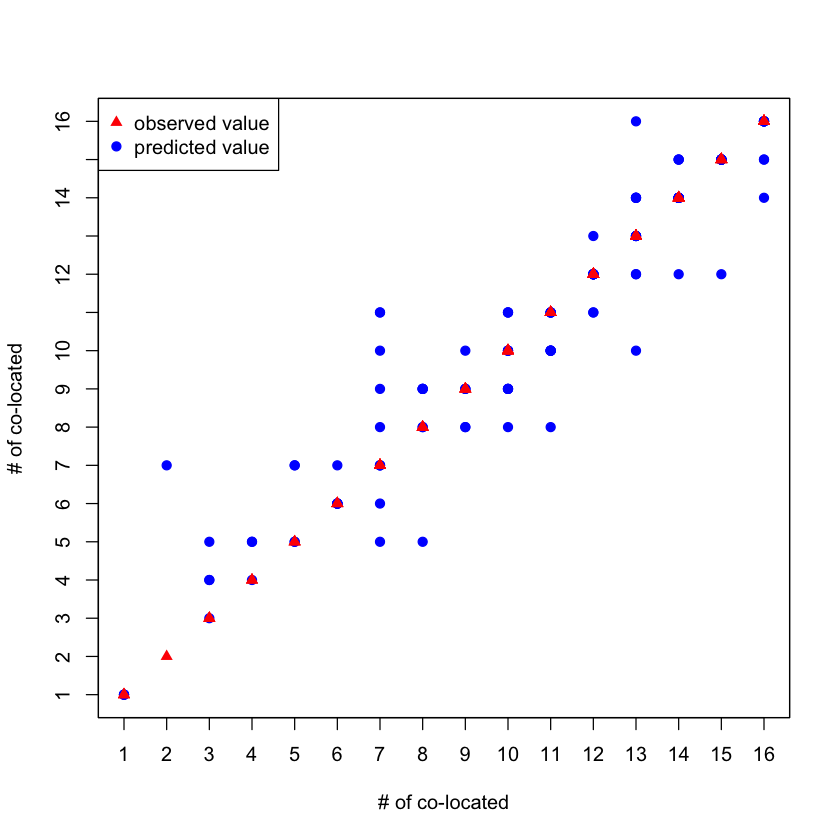

In [11]:
comparason = cbind(predicted,testingSet['set'])

plot(x = comparason$set , y = round(comparason$predicted),col="blue",pch=19,xlab="# of co-located",ylab="# of co-located", xaxt='n',yaxt='n')
par(new=TRUE)
plot(x = comparason$set , y = comparason$set, col="red",pch=17, xlab='', ylab='', xaxt='n',yaxt='n')
axis(1,1:16)
axis(2,1:16)
legend("topleft",legend=c("observed value","predicted value"),pch=c(17,19), col=c("red","blue"))



In [12]:
print("correct prediction")
mean(as.character(comparason$set) == as.character(round(comparason$pred)))

[1] "correct prediction"


[1] 0.5808824